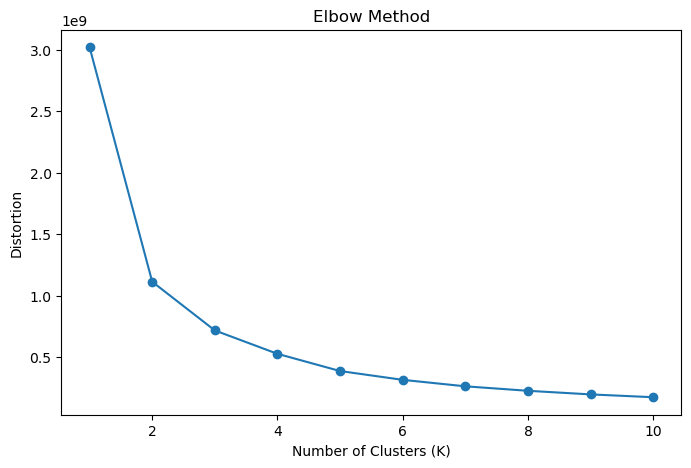

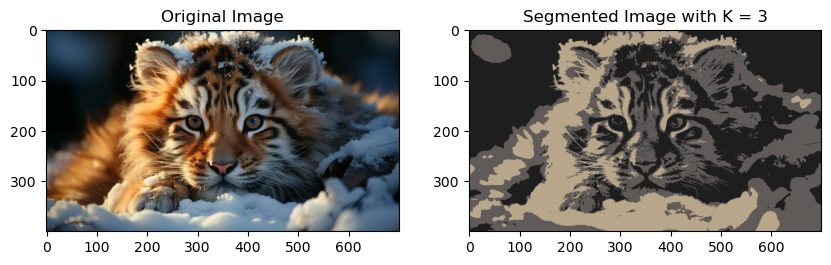

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the image
image = cv2.imread("//Users/usufahmed/Desktop/lab.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = image.reshape((-1, 3))

# Convert to float
pixels = np.float32(pixels)

# Elbow Method to Find Optimal K
distortions = []
K_range = range(1, 11)  # Test K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    distortions.append(kmeans.inertia_)  # Inertia: Sum of squared distances to nearest cluster center

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.show()

# Define optimal K (can be chosen from the elbow curve)
optimal_k = 3  # Set to 3 or decide based on the elbow plot

# Apply KMeans with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pixels)

# Get the cluster centers and labels
centers = np.uint8(kmeans.cluster_centers_)
labels = kmeans.labels_

# Map the labels to the original image shape
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Segmented Image with K = %d' % optimal_k)
plt.imshow(segmented_image)
plt.show()